# FFT

RMS of signal x1: 1.001
RMS of signal x2: 1.000
Pk-Pk of signal x1: 4.703
Pk-Pk of signal x2: 3.640
Absolute difference in RMS: 0.001
Percentual difference in RMS: 0.11%
Absolute difference in Pk-Pk: 1.063
Percentual difference in Pk-Pk: 22.60%


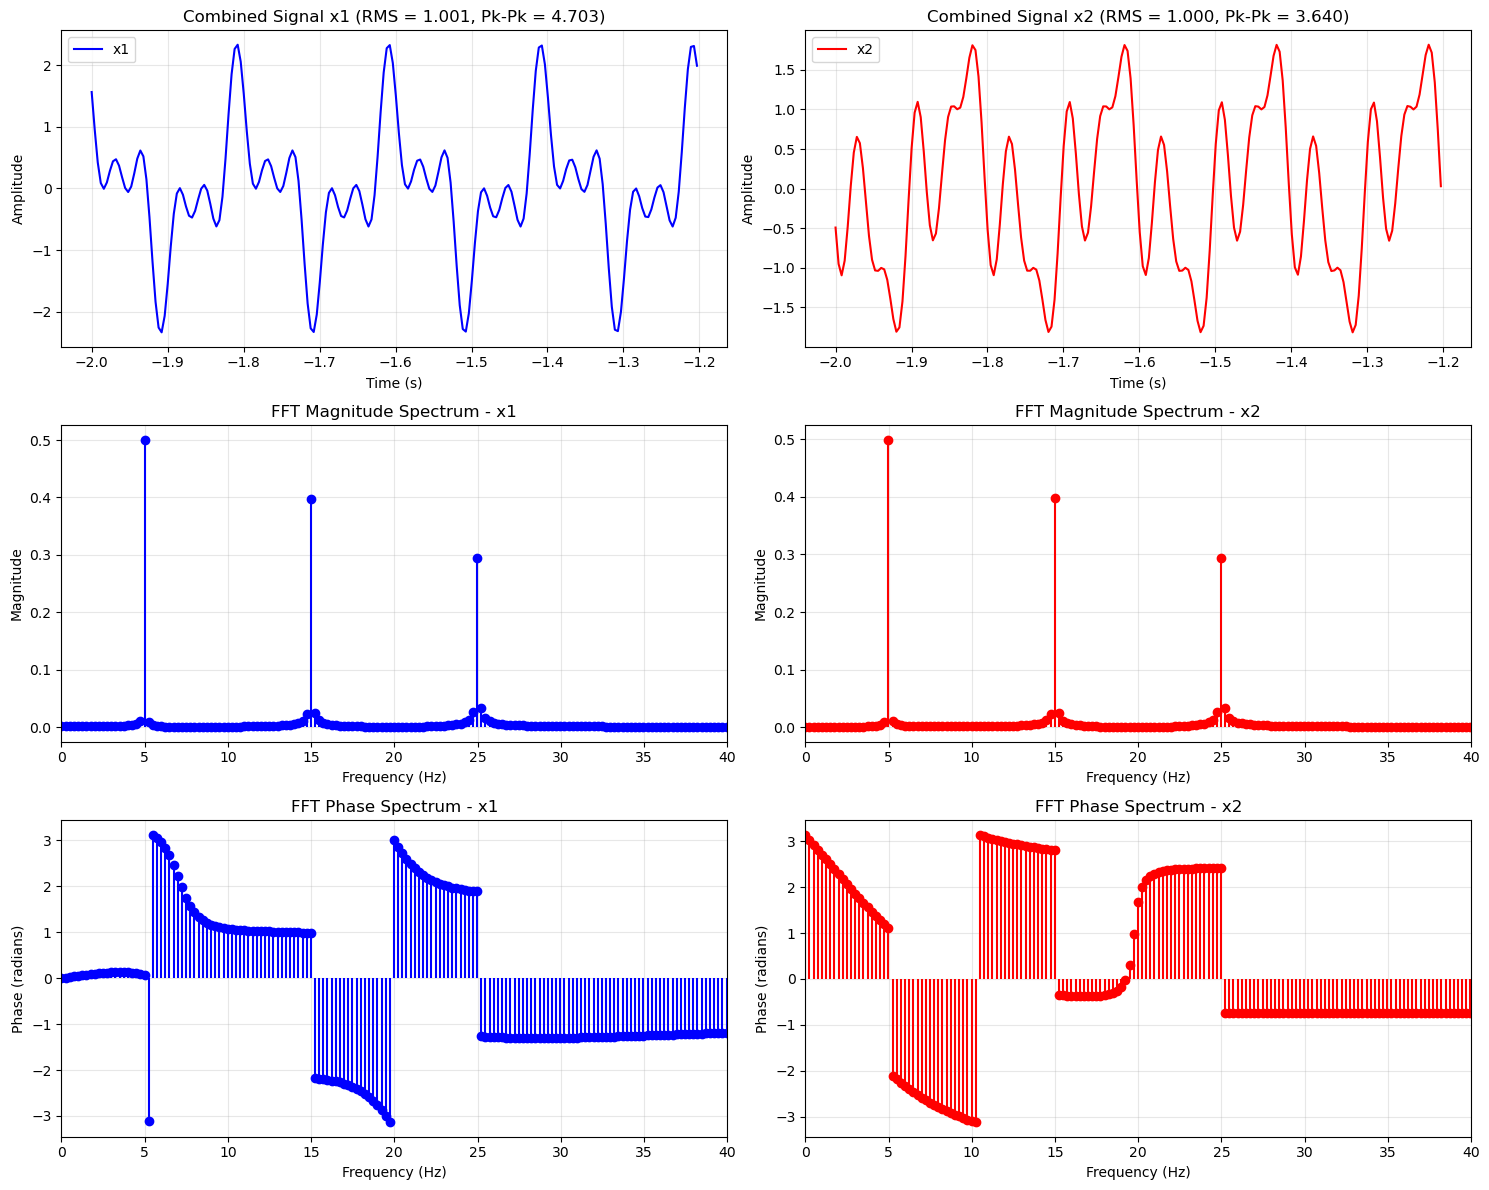


ANALYSIS:
Both signals x1 and x2 contain the same frequency components:
- 5 Hz (fundamental frequency)
- 15 Hz (third harmonic)
- 25 Hz (fifth harmonic)

The FFT magnitude spectra are nearly identical because:
- Both signals have the same frequency content
- Only the phases of individual components differ
- FFT magnitude is independent of phase information

However, the RMS and pk-pk values are different because:
- Different phase relationships cause constructive/destructive interference
- RMS depends on the instantaneous power, which varies with phase
- Pk-Pk (peak-to-peak) value also depends on phase relationships
- This demonstrates how phase affects signal energy distribution and amplitude range

Percentual difference in RMS: 0.11%
Percentual difference in Pk-Pk: 22.60%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sinusoidal signal function
def sinusoidal(t, A=1, omega=2*np.pi, phi=0):
    return A * np.cos(omega * t + phi)

# RMS calculation function
def rms(x):
    return np.sqrt(np.mean(np.square(x)))

# Peak-to-peak calculation function
def pk2pk(x):
    return np.max(x) - np.min(x)

# Time vector
t = np.linspace(-2, 2, 1000)

# Create three base signals with different frequencies
s1 = sinusoidal(t, A=1, omega=2*np.pi*5, phi=0)      # 5 Hz
s2 = sinusoidal(t, A=0.8, omega=2*np.pi*15, phi=np.pi/4)  # 15 Hz, phase π/4
s3 = sinusoidal(t, A=0.6, omega=2*np.pi*25, phi=np.pi/2)  # 25 Hz, phase π/2

# Combination 1: All signals with original phases
x1 = s1 + s2 + s3

# Combination 2: Same signals but with different phase relationships
s1_mod = sinusoidal(t, A=1, omega=2*np.pi*5, phi=np.pi/3)
s2_mod = sinusoidal(t, A=0.8, omega=2*np.pi*15, phi=5*np.pi/6)
s3_mod = sinusoidal(t, A=0.6, omega=2*np.pi*25, phi=2*np.pi/3)
x2 = s1_mod + s2_mod + s3_mod

# Calculate RMS and pk-pk values
rms_x1 = rms(x1)
rms_x2 = rms(x2)
pkpk_x1 = pk2pk(x1)
pkpk_x2 = pk2pk(x2)

# Calculate percent differences
rms_diff = abs(rms_x1 - rms_x2)
pkpk_diff = abs(pkpk_x1 - pkpk_x2)
rms_perc = 100 * rms_diff / rms_x1 if rms_x1 != 0 else 0
pkpk_perc = 100 * pkpk_diff / pkpk_x1 if pkpk_x1 != 0 else 0

print(f"RMS of signal x1: {rms_x1:.3f}")
print(f"RMS of signal x2: {rms_x2:.3f}")
print(f"Pk-Pk of signal x1: {pkpk_x1:.3f}")
print(f"Pk-Pk of signal x2: {pkpk_x2:.3f}")
print(f"Absolute difference in RMS: {rms_diff:.3f}")
print(f"Percentual difference in RMS: {rms_perc:.2f}%")
print(f"Absolute difference in Pk-Pk: {pkpk_diff:.3f}")
print(f"Percentual difference in Pk-Pk: {pkpk_perc:.2f}%")

# Compute FFTs
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
freqs = np.fft.fftfreq(len(t), d=(t[1]-t[0]))

# Only plot the positive frequencies
idx = np.argsort(freqs)
freqs_sorted = freqs[idx]
X1_sorted = X1[idx]
X2_sorted = X2[idx]
pos_mask = freqs_sorted >= 0

# Create a comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

slice = 200  # Show more of the signal for better visualization

# First row: time domain signals
axes[0,0].plot(t[:slice], x1[:slice], 'b-', linewidth=1.5, label='x1')
axes[0,0].set_title(f'Combined Signal x1 (RMS = {rms_x1:.3f}, Pk-Pk = {pkpk_x1:.3f})')
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

axes[0,1].plot(t[:slice], x2[:slice], 'r-', linewidth=1.5, label='x2')
axes[0,1].set_title(f'Combined Signal x2 (RMS = {rms_x2:.3f}, Pk-Pk = {pkpk_x2:.3f})')
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# Second row: FFT Magnitude spectra
axes[1,0].stem(freqs_sorted[pos_mask], np.abs(X1_sorted[pos_mask])/len(t), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[1,0].set_title('FFT Magnitude Spectrum - x1')
axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Magnitude')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlim(0, 40)

axes[1,1].stem(freqs_sorted[pos_mask], np.abs(X2_sorted[pos_mask])/len(t), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[1,1].set_title('FFT Magnitude Spectrum - x2')
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Magnitude')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlim(0, 40)

# Third row: FFT Phase spectra
axes[2,0].stem(freqs_sorted[pos_mask], np.angle(X1_sorted[pos_mask]), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[2,0].set_title('FFT Phase Spectrum - x1')
axes[2,0].set_xlabel('Frequency (Hz)')
axes[2,0].set_ylabel('Phase (radians)')
axes[2,0].grid(True, alpha=0.3)
axes[2,0].set_xlim(0, 40)

axes[2,1].stem(freqs_sorted[pos_mask], np.angle(X2_sorted[pos_mask]), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[2,1].set_title('FFT Phase Spectrum - x2')
axes[2,1].set_xlabel('Frequency (Hz)')
axes[2,1].set_ylabel('Phase (radians)')
axes[2,1].grid(True, alpha=0.3)
axes[2,1].set_xlim(0, 40)

plt.tight_layout()
plt.show()

# Analysis
print("\n" + "="*60)
print("ANALYSIS:")
print("="*60)
print("Both signals x1 and x2 contain the same frequency components:")
print("- 5 Hz (fundamental frequency)")
print("- 15 Hz (third harmonic)")  
print("- 25 Hz (fifth harmonic)")
print()
print("The FFT magnitude spectra are nearly identical because:")
print("- Both signals have the same frequency content")
print("- Only the phases of individual components differ")
print("- FFT magnitude is independent of phase information")
print()
print("However, the RMS and pk-pk values are different because:")
print("- Different phase relationships cause constructive/destructive interference")
print("- RMS depends on the instantaneous power, which varies with phase")
print("- Pk-Pk (peak-to-peak) value also depends on phase relationships")
print("- This demonstrates how phase affects signal energy distribution and amplitude range")
print()
print(f"Percentual difference in RMS: {rms_perc:.2f}%")
print(f"Percentual difference in Pk-Pk: {pkpk_perc:.2f}%")
